In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/AlexanderNik2020/data_analysis_and_visualization/main/parsed_data/data.txt'
data = pd.read_csv(url, sep = '\t', index_col = 'Номер')

In [ ]:
data

,Год,Цена,Топливо,Объем,Мощность,Коробка,Привод,Цвет,Пробег,Руль,Поколение
Номер,,,,,,,,,,,
1,2006,680000,бензин,2.0,140,АКПП,4WD,серый,352447,левый,"1 поколение, рестайлинг"
2,2011,1077000,бензин,2.5,169,вариатор,4WD,серый,164000,левый,2 поколение
3,2017,1400000,бензин,2.0,144,вариатор,4WD,черный,200000,левый,3 поколение
4,2001,365000,бензин,2.0,150,механика,4WD,серый,280000,правый,1 поколение
5,2017,1850000,бензин,2.5,171,вариатор,4WD,зеленый,118500,левый,3 поколение
...,...,...,...,...,...,...,...,...,...,...,...
296,2008,937000,бензин,2.5,169,вариатор,4WD,серебристый,179000,левый,2 поколение
297,2018,1485000,бензин,2.0,147,вариатор,передний,красный,49000,правый,"3 поколение, рестайлинг"
298,2012,1100000,бензин,2.0,141,вариатор,4WD,серебристый,145000,левый,"2 поколение, рестайлинг"


In [ ]:
transmission = "\u043C\u0435\u0445\u0430\u043D\u0438\u043A\u0430" #@param ['Все', 'АКПП', 'механика', 'вариатор']
steering_wheel = "\u043F\u0440\u0430\u0432\u044B\u0439" #@param ['Все', 'левый', 'правый']

In [ ]:
data.sort_values('Год').head(5)


,Год,Цена,Топливо,Объем,Мощность,Коробка,Привод,Цвет,Пробег,Руль,Поколение
Номер,,,,,,,,,,,
253,2000,375000,бензин,2.0,150,АКПП,4WD,зеленый,360000,правый,1 поколение
113,2000,375000,бензин,2.0,150,АКПП,4WD,зеленый,360000,правый,1 поколение
59,2001,499000,бензин,2.0,150,АКПП,передний,серый,265000,правый,1 поколение
267,2001,600000,бензин,2.0,150,АКПП,4WD,белый,202959,правый,1 поколение
265,2001,495000,бензин,2.0,150,АКПП,4WD,серый,298000,правый,1 поколение


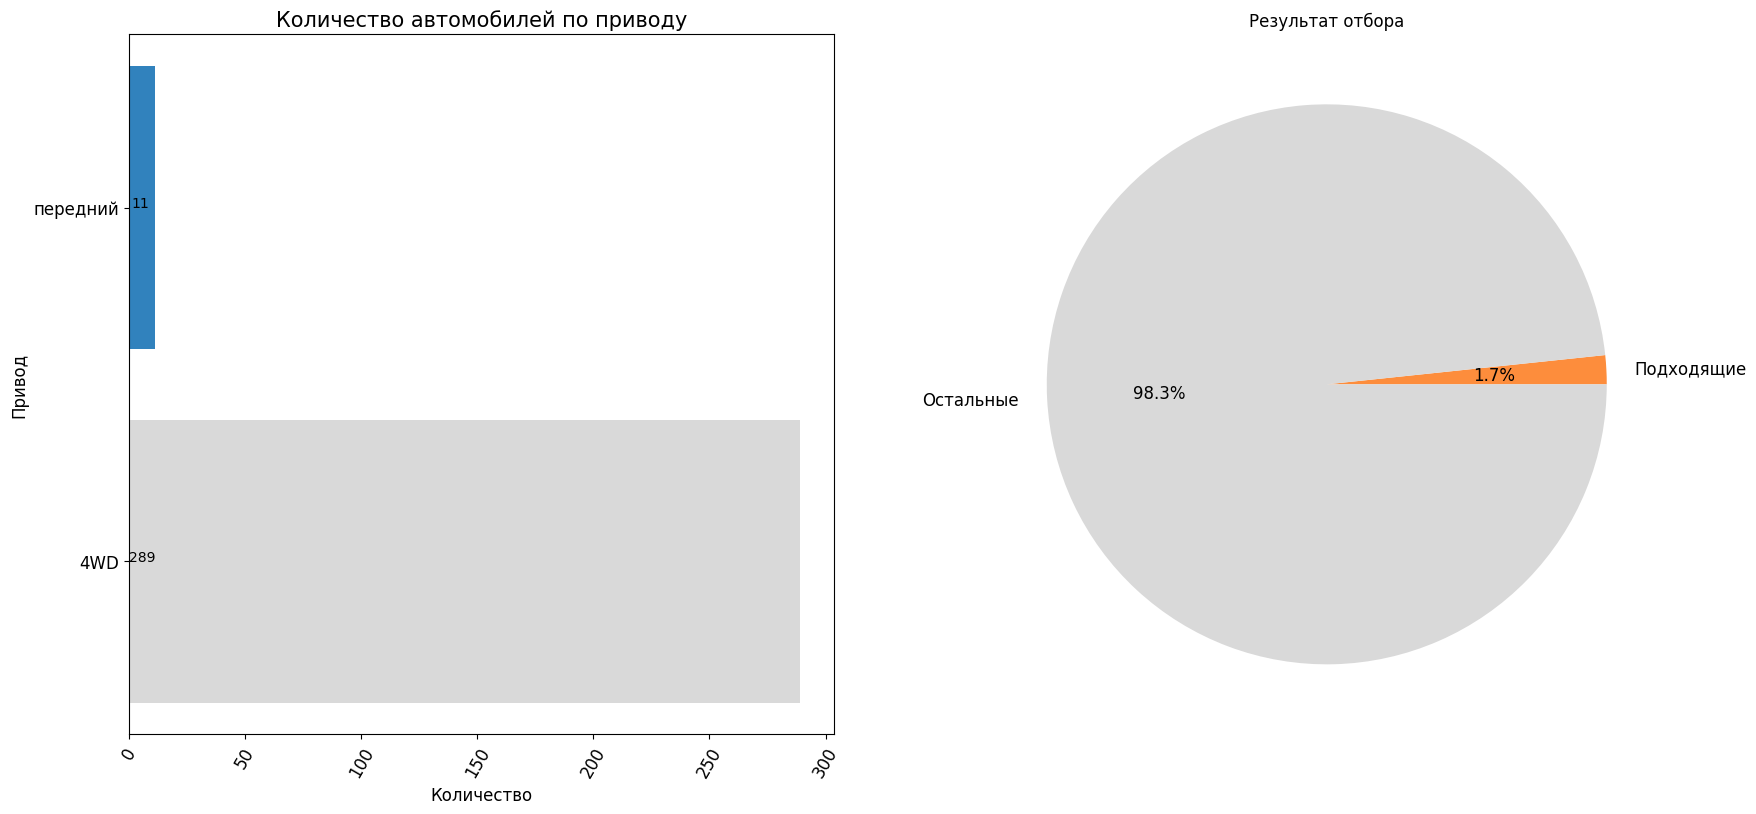

In [ ]:
cmap = plt.get_cmap('tab20c')

def circle_picture():
    selected_data = data
    if transmission != 'Все':
        selected_data = selected_data.loc[ selected_data['Коробка'] == transmission ]
    if steering_wheel != 'Все':
        selected_data = selected_data.loc[ selected_data['Руль'] == steering_wheel ]


    label = ['Подходящие', 'Остальные']
    values = [selected_data.shape[0], data.shape[0] - selected_data.shape[0]]
    
    plt.subplot(222)
    plt.title('Результат отбора', fontsize=12)
    plt.pie(values, labels=label, autopct='%1.1f%%', textprops={'fontsize': 12}, colors=cmap(values))

def rating_picture():
    selected_data = data
    
    y = selected_data['Привод'].value_counts()
    x = y.index

    plt.subplot(221)
    plt.title('Количество автомобилей по приводу', fontsize=15)
    colors = [cmap((i - y.min() + 0.2) / (y.max() - y.min() + 0.1)) for i in y]
    plt.barh(x, y, label='Количество автомобилей', color = colors)
    plt.xticks(rotation=60)
    plt.ylabel('Привод', fontsize = 12)
    plt.xlabel('Количество', fontsize = 12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.text(0, x[0], y[0])
    plt.text(1, x[1], y[1])

def avg_picture():
    

plt.figure(figsize=(20, 20))

rating_picture()
circle_picture()

plt.show()

Цель визуализации оценить распределение автомобилей Nissan X-trail на рынке Иркутской области.

Благодаря данной визуализации мы можем понять, что в нашем регионе преобладают  автомобили Nissan X-trail с полным приводом, но на механике и с правым рулем автомобили в меньшенстве.